In [1]:
import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

# Fasion MNISTをCNNでクラス分類

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

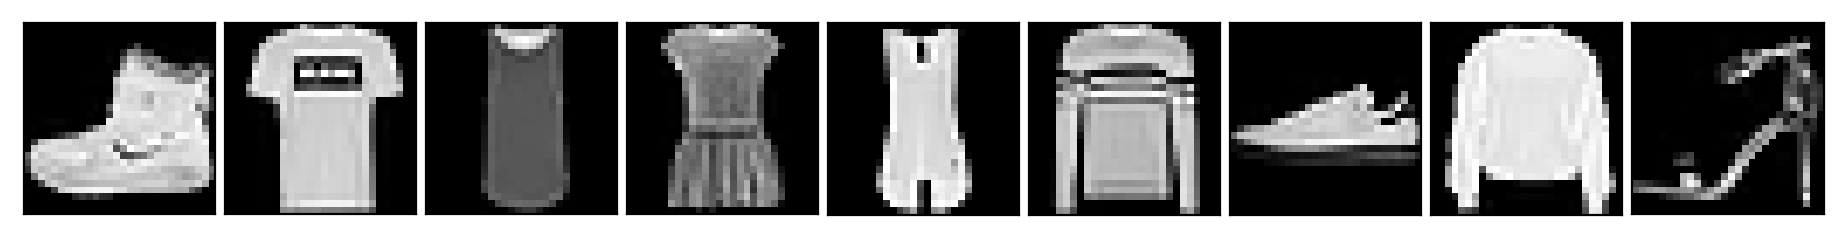

In [3]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [4]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Lesson1の多層パーセプトロンでは入力を (バッチサイズ、画素数) の2次元テンソルとして扱いましたが、 
CNNでは2次元の画像として処理していくために4次元テンソル (バッチサイズ、縦の画素数、横の画素数、チャンネル数)として扱います。 
チャンネル数は白黒画像の場合は1、 カラー画像の場合はRGBで3です。

In [19]:
model = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                kernel_initializer='he_normal', input_shape=(28, 28, 1)))  #28×28×1 -> 24×24×16
model.add(MaxPooling2D(pool_size=(2, 2)))  #24×24×16 -> 12×12×16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',
                kernel_initializer='he_normal'))  #12×12×16 -> 8×8×64
model.add(MaxPooling2D(pool_size=(2, 2)))  #8×8×64 -> 4×4×64 

model.add(Flatten())  #4×4×64  -> 1024
model.add(Dense(10, activation='softmax'))  #1024 -> 10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


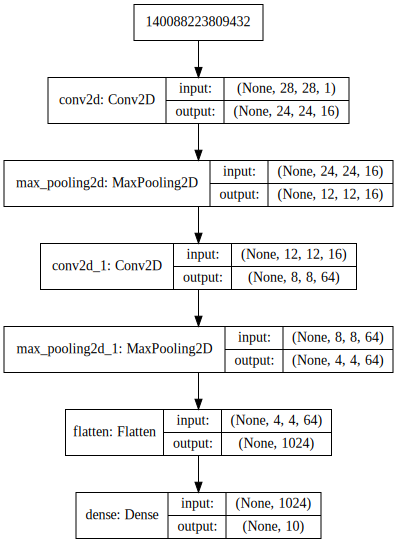

In [23]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
         validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 42s 702us/sample - loss: 0.5428 - acc: 0.8049 - val_loss: 0.4331 - val_acc: 0.8383
Epoch 2/100
60000/60000 [==============================] - 34s 562us/sample - loss: 0.3536 - acc: 0.8745 - val_loss: 0.3446 - val_acc: 0.8769
Epoch 3/100
60000/60000 [==============================] - 37s 619us/sample - loss: 0.3061 - acc: 0.8903 - val_loss: 0.3397 - val_acc: 0.8768
Epoch 4/100
60000/60000 [==============================] - 43s 721us/sample - loss: 0.2786 - acc: 0.9000 - val_loss: 0.3118 - val_acc: 0.8912
Epoch 5/100
60000/60000 [==============================] - 40s 670us/sample - loss: 0.2552 - acc: 0.9093 - val_loss: 0.3155 - val_acc: 0.8831
Epoch 00005: early stopping


In [25]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.3154891956806183
Test accuracy:  0.8831


**Observation**
- MLPでの性能は以下
    - Test loss:  0.3261532645702362
    - Test accuracy:  0.8842
- 性能が向上してはいけない。early_stoppingしたから?

# CIFAR10のデータをCNNでクラス分類

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

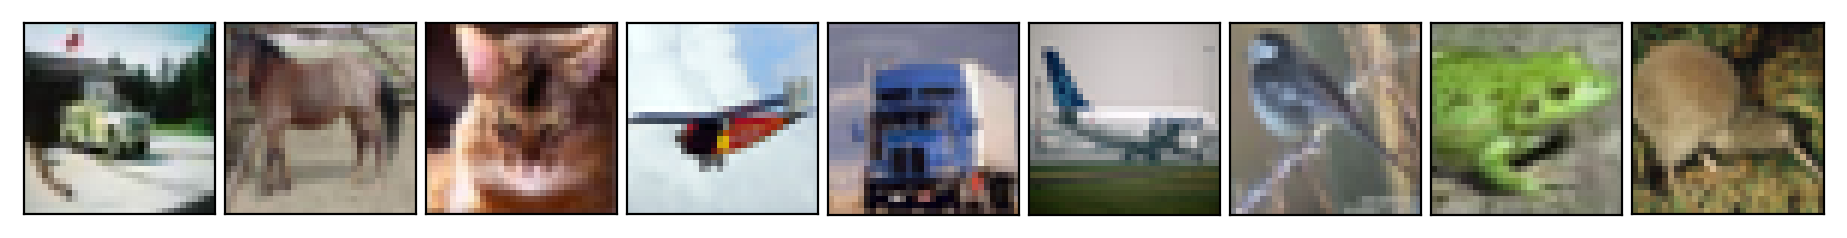

In [6]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [7]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


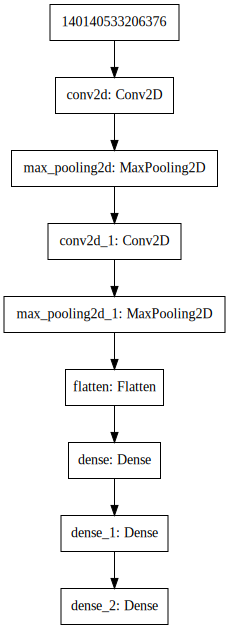

In [8]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
40000/40000 [==============================] - 31s 769us/sample - loss: 1.7688 - acc: 0.3582 - val_loss: 1.5162 - val_acc: 0.4487
Epoch 2/100
40000/40000 [==============================] - 32s 795us/sample - loss: 1.4503 - acc: 0.4761 - val_loss: 1.4148 - val_acc: 0.4793
Epoch 3/100
40000/40000 [==============================] - 27s 670us/sample - loss: 1.3442 - acc: 0.5160 - val_loss: 1.3650 - val_acc: 0.5137
Epoch 4/100
40000/40000 [==============================] - 30s 738us/sample - loss: 1.2621 - acc: 0.5500 - val_loss: 1.2893 - val_acc: 0.5463
Epoch 5/100
40000/40000 [==============================] - 44s 1ms/sample - loss: 1.2020 - acc: 0.5707 - val_loss: 1.2570 - val_acc: 0.5608
Epoch 6/100
40000/40000 [==============================] - 47s 1ms/sample - loss: 1.1536 - acc: 0.5907 - val_loss: 1.2801 - val_acc: 0.5514
Epoch 00006: early stopping


In [10]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  1.265980617904663
Test accuracy:  0.553


**Observation**
- そこまで性能が高くない